In [1]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer, GPT2Tokenizer, GPT2Model 

from tqdm import tqdm
import random
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import os

In [13]:
import pandas as pd
path = "~/Desktop/masterprojet/"
name = "Individual.csv"
# Créer un DataFrame
selected_feature = ['sex','geography','nationality']
data = pd.read_csv(name, sep=',', header=0).reindex(columns=selected_feature)

data

,sex,geography,nationality
0,female,Wales,United Kingdom
1,female,South East,United Kingdom
2,male,London,United Kingdom
3,female,Yorkshire and The Humber,United Kingdom
4,male,North West,United Kingdom
...,...,...,...
9995,female,London,United Kingdom
9996,male,East Midlands,United Kingdom
9997,female,East,United Kingdom
9998,male,West Midlands,China


In [18]:
data.head()

,sex,geography,nationality
0,female,Wales,United Kingdom
1,female,South East,United Kingdom
2,male,London,United Kingdom
3,female,Yorkshire and The Humber,United Kingdom
4,male,North West,United Kingdom


In [19]:
all_columns = data.columns.tolist()
print("All Columns: ", all_columns)

All Columns:  ['sex', 'geography', 'nationality']


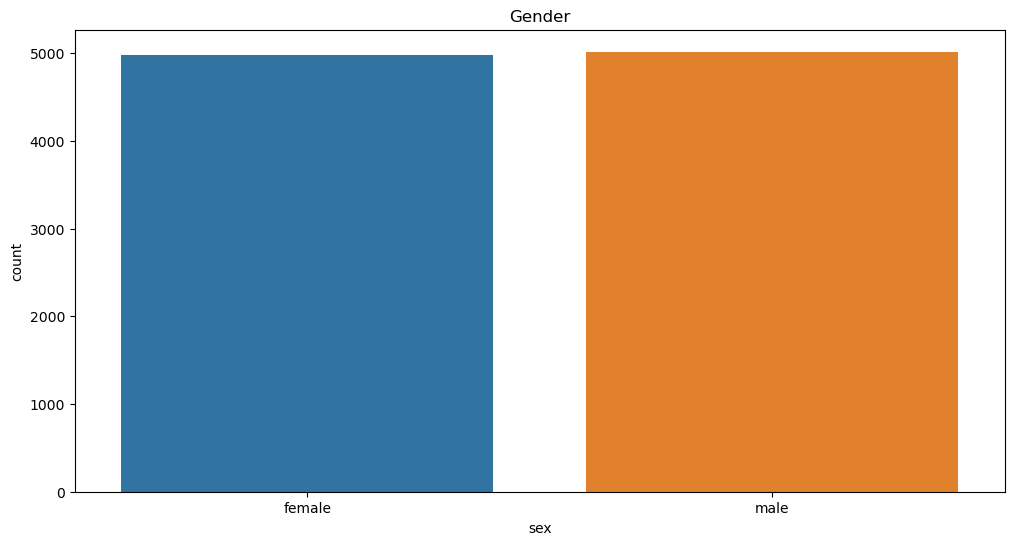

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='sex')
plt.title('Gender')
plt.show()

In [ ]:
import pandas as pd
path = "~/Desktop/masterprojet/"
name = "Individual.csv"
# Créer un DataFrame
selected_feature = ['sex','geography','nationality']
data = pd.read_csv(name, sep=',', header=0).reindex(columns=selected_feature)

data

In [37]:
#load les fichiers qui m'interessent
selected_csv = ['Loan.csv', 'Factoring.csv', 'Credit_Rating.csv']
data_loan = pd.read_csv(selected_csv[0], sep=',', header=0)
data_factor = pd.read_csv(selected_csv[1], sep=',', header=0)
data_rating = pd.read_csv(selected_csv[2], sep=',', header=0)

data_rating

,Unnamed: 0,company_reg_number,credit_report_agency,credit_report_date,credit_report_model,credit_report_requests_to_view_last_five_years,credit_report_total_indebtedness,liens_filed_and_open,liens_closed_last_five_years,missed_and_late_payments_last_five_years,filed_court_cases_last_five_years,payment_index,credit_report_negative_items,credit_report_good_standing_items,business_failure_score,credit_report_credit_score,ratio_debt_to_revenue
0,0,20000000,Experian,2021-11-23,FICO 8,6,7548.00,0,1,0,0,2,1,4,63,765,0.013964
1,1,20000001,Equifax,2021-01-29,FICO 8,5,28100.00,0,0,0,0,21,1,1,59,676,0.121491
2,2,20000002,Equifax,2021-04-13,FICO 8,6,15631.00,0,1,0,0,16,1,4,53,663,0.076898
3,3,20000003,Equifax,2021-09-25,FICO 4,3,0.00,0,0,0,0,2,0,3,93,0,0.000000
4,4,20000004,Equifax,2021-08-13,FICO 9,0,75605.28,0,0,0,0,17,0,4,81,773,0.193195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,20000995,TransUnion,2021-03-03,FICO 9,0,0.00,0,1,3,0,16,5,0,47,736,0.000000
896,896,20000996,Experian,2021-03-19,FICO 9,7,13460.00,0,0,7,0,86,7,3,0,584,0.063807
897,897,20000997,Experian,2021-11-07,FICO 8,8,53532.56,0,0,0,1,9,1,4,58,653,0.357946
898,898,20000998,Experian,2020-12-09,FICO 8,0,50948.00,0,0,0,0,1,0,2,77,0,0.125415


In [27]:
data_factor

,Unnamed: 0,company_reg_number,revenue_2019,factor_amount,factor_percent,factoring_type,factoring_provider
0,0,20000000,540536,0,0,NaN,NaN
1,1,20000001,231292,0,0,NaN,NaN
2,2,20000002,203270,0,0,NaN,NaN
3,3,20000003,118794,0,0,NaN,NaN
4,4,20000004,391341,0,0,NaN,NaN
...,...,...,...,...,...,...,...
969,969,20000995,288940,0,0,NaN,NaN
970,970,20000996,210947,0,0,NaN,NaN
971,971,20000997,149555,0,0,NaN,NaN
972,972,20000998,406235,0,0,NaN,NaN


In [40]:
#fusionner les data
import pandas as pd

# Fusionner les DataFrames sur 'company_reg_number'
merged_df = pd.merge(data_loan, data_factor, on='company_reg_number', how='inner')

merged_df

,Unnamed: 0_x,loan,overdraft,primary_sector,company_reg_number,loan_id,loan_start_date,loan_original_amount,loan_status,loan_repayment_frequency,...,loan_satisfaction_date,early_repayment_allowed,fixed_interest,total_time_payments_late,Unnamed: 0_y,revenue_2019,factor_amount,factor_percent,factoring_type,factoring_provider
0,0,0,1,47 : Retail,20000000,20000000_Overdraft_1,2020-03-28,41000,Repaid,Monthly,...,2021-03-28 00:00:00,0.0,0,0,0,540536,0,0,NaN,NaN
1,1,0,1,77-82 : Business administration & support serv...,20000017,20000017_Overdraft_1,2021-01-23,37400,Defaulted,Monthly,...,NaN,NaN,0,0,16,232234,0,0,NaN,NaN
2,2,0,1,49-53 : Transport & Storage (inc. postal),20000031,20000031_Overdraft_1,2021-01-23,26300,Repaid,Monthly,...,2021-02-14 00:00:00,1.0,0,27,30,190664,0,0,NaN,NaN
3,3,0,1,46 : Wholesale,20000034,20000034_Overdraft_1,2019-12-24,169850,Repaid,Monthly,...,2020-01-11 00:00:00,1.0,0,0,33,1368691,0,0,NaN,NaN
4,4,0,1,46 : Wholesale,20000034,20000034_Overdraft_2,2020-07-02,201000,Available,Monthly,...,NaN,1.0,0,0,33,1368691,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,0,1,"01-03 : Agriculture, forestry & fishing",20000947,20000947_Overdraft_1,2021-05-12,30350,Repaid,Monthly,...,2021-07-30 00:00:00,1.0,0,0,921,190062,0,0,NaN,NaN
85,86,1,0,"01-03 : Agriculture, forestry & fishing",20000953,20000953_Loan_1,2021-07-20,40250,Disbursing,Monthly,...,NaN,1.0,0,0,927,190823,0,0,NaN,NaN
86,87,0,1,86-88 : Health,20000970,20000970_Overdraft_1,2021-10-31,22800,Repaid,Monthly,...,2022-10-31 00:00:00,1.0,0,0,944,144180,0,0,NaN,NaN
87,88,0,1,49-53 : Transport & Storage (inc. postal),20000984,20000984_Overdraft_1,2021-06-03,32450,Repaid,Monthly,...,2021-06-27 00:00:00,1.0,0,0,958,180755,0,0,NaN,NaN


In [42]:
#fusionner les data
import pandas as pd

# Fusionner les DataFrames sur 'company_reg_number'
merged_df = pd.merge(merged_df, data_rating, on='company_reg_number', how='inner')

merged_df

,Unnamed: 0_x,loan,overdraft,primary_sector,company_reg_number,loan_id,loan_start_date,loan_original_amount,loan_status,loan_repayment_frequency,...,liens_filed_and_open,liens_closed_last_five_years,missed_and_late_payments_last_five_years,filed_court_cases_last_five_years,payment_index,credit_report_negative_items,credit_report_good_standing_items,business_failure_score,credit_report_credit_score,ratio_debt_to_revenue
0,0,0,1,47 : Retail,20000000,20000000_Overdraft_1,2020-03-28,41000,Repaid,Monthly,...,0,1,0,0,2,1,4,63,765,0.013964
1,1,0,1,77-82 : Business administration & support serv...,20000017,20000017_Overdraft_1,2021-01-23,37400,Defaulted,Monthly,...,0,0,7,0,33,8,4,52,755,0.000000
2,2,0,1,49-53 : Transport & Storage (inc. postal),20000031,20000031_Overdraft_1,2021-01-23,26300,Repaid,Monthly,...,0,0,4,0,43,7,2,50,691,0.130717
3,3,0,1,46 : Wholesale,20000034,20000034_Overdraft_1,2019-12-24,169850,Repaid,Monthly,...,1,1,8,0,46,11,1,48,0,0.244279
4,4,0,1,46 : Wholesale,20000034,20000034_Overdraft_2,2020-07-02,201000,Available,Monthly,...,1,1,8,0,46,11,1,48,0,0.244279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,0,1,"01-03 : Agriculture, forestry & fishing",20000947,20000947_Overdraft_1,2021-05-12,30350,Repaid,Monthly,...,0,0,0,0,6,0,4,78,793,0.000000
85,86,1,0,"01-03 : Agriculture, forestry & fishing",20000953,20000953_Loan_1,2021-07-20,40250,Disbursing,Monthly,...,0,0,0,0,17,1,2,51,799,0.415170
86,87,0,1,86-88 : Health,20000970,20000970_Overdraft_1,2021-10-31,22800,Repaid,Monthly,...,0,0,5,0,54,5,6,34,673,0.100381
87,88,0,1,49-53 : Transport & Storage (inc. postal),20000984,20000984_Overdraft_1,2021-06-03,32450,Repaid,Monthly,...,0,0,3,0,77,3,5,10,433,0.172792


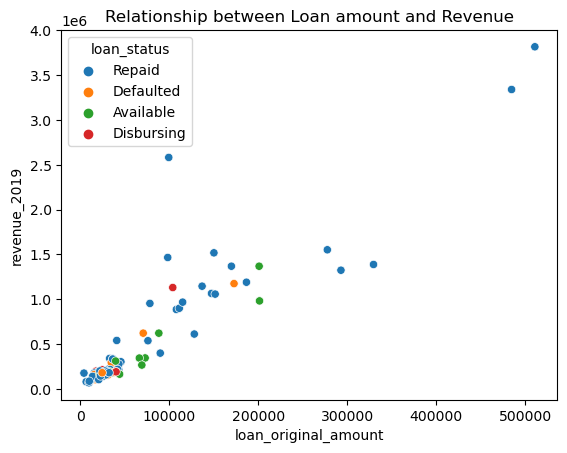

In [29]:
sns.scatterplot(data=merged_df, x='loan_original_amount', y='revenue_2019', hue='loan_status')
plt.title('Relationship between Loan amount and Revenue')
plt.show()


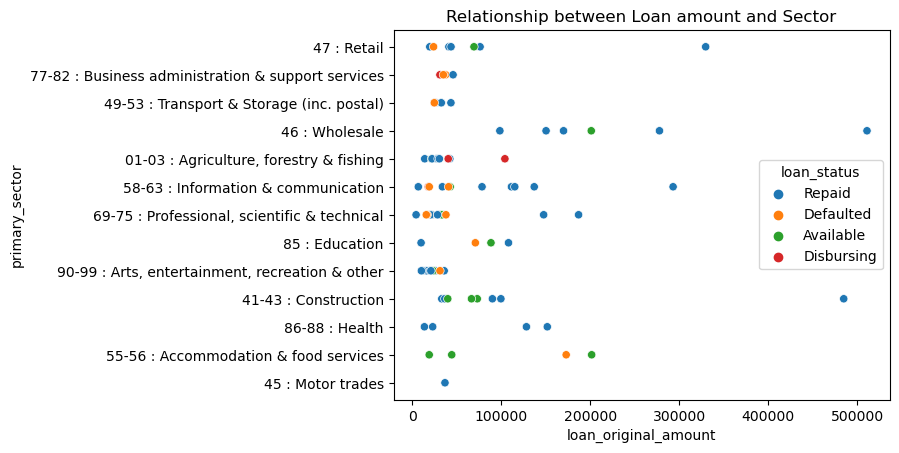

In [31]:
sns.scatterplot(data=merged_df, x='loan_original_amount', y='primary_sector', hue='loan_status')
plt.title('Relationship between Loan amount and Sector')
plt.show()

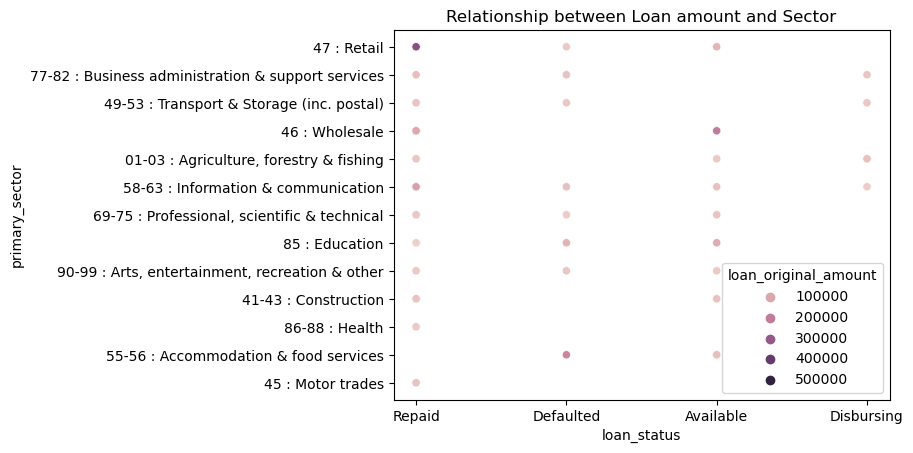

In [32]:
sns.scatterplot(data=merged_df, x='loan_status', y='primary_sector', hue='loan_original_amount')
plt.title('Relationship between Loan amount and Sector')
plt.show()

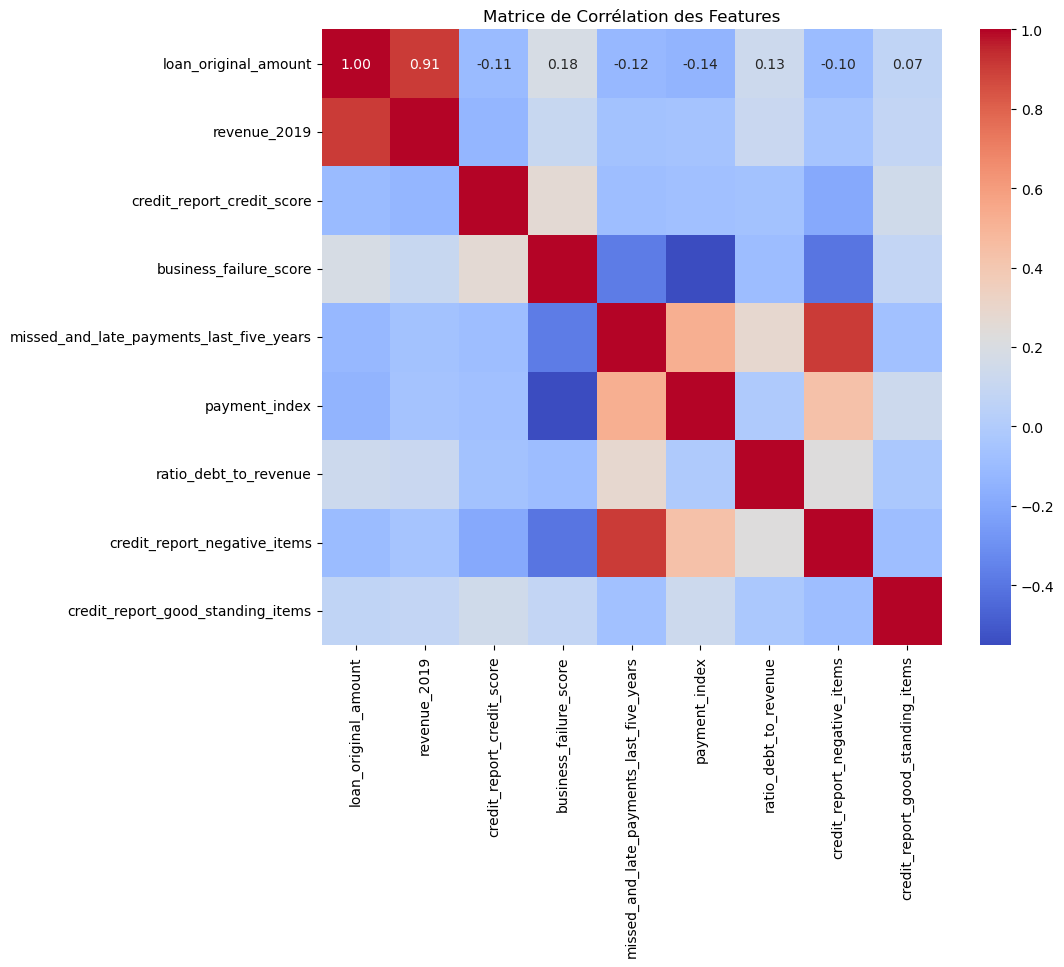

In [45]:
# Calculer la matrice de corrélation
corr_matrix = merged_df[['loan_original_amount', 'revenue_2019', 'credit_report_credit_score', 'business_failure_score','missed_and_late_payments_last_five_years','payment_index', 'ratio_debt_to_revenue','credit_report_negative_items','credit_report_good_standing_items']].corr()

# Afficher la matrice de corrélation avec Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Features')
plt.show()

In [ ]:
#higher the revenue is, higher loan amount will be. 